In [1]:
'''
Validation and Model Selection
In this section, we'll look atmodel evaluationand the tuning of hyperparameters,
which are parameters that define the model.
'''
from __future__ import print_function, division
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

y_pred = knn.predict(X)

print("{0} / {1} correct".format(np.sum(y == y_pred), len(y)))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("{0} / {1} correct".format(np.sum(y_test == y_pred), len(y_test)))

1797 / 1797 correct
447 / 450 correct


In [3]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

knn.score(X_test, y_test)

for n_neighbors in [1, 5, 10, 20, 30]:
  knn = KNeighborsClassifier(n_neighbors)
  knn.fit(X_train, y_train)
  print(n_neighbors, knn.score(X_test, y_test))

1 0.9933333333333333
5 0.9911111111111112
10 0.9822222222222222
20 0.98
30 0.9777777777777777


In [4]:
X1, X2, y1, y2 = train_test_split(X, y, test_size=0.5, random_state=0)
X1.shape, X2.shape

print(KNeighborsClassifier(1).fit(X2, y2).score(X1, y1))
print(KNeighborsClassifier(1).fit(X1, y1).score(X2, y2))

0.9832962138084632
0.982202447163515


In [5]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(KNeighborsClassifier(1), X, y, cv=10)
cv.mean()

0.9749627560521414

In [6]:
cross_val_score(KNeighborsClassifier(1), X, y, cv=10)

array([0.93333333, 0.99444444, 0.97222222, 0.97222222, 0.96666667,
       0.98333333, 0.99444444, 0.98882682, 0.97765363, 0.96648045])

In [9]:
def test_func(x, err=0.5):
  y = 10 - 1. / (x + 0.1)
  if err > 0:
    y = np.random.normal(y, err)
  return y

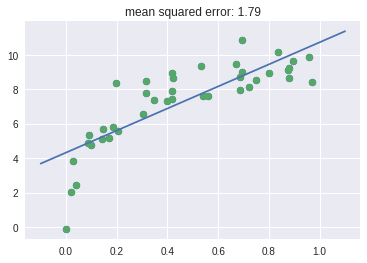

In [10]:
def make_data(N=40, error=1.0, random_seed=1):
# randomly sample the data
  np.random.seed(1)
  X = np.random.random(N)[:, np.newaxis]
  y = test_func(X.ravel(), error)

  return X, y

X, y = make_data(40, error=1)
plt.scatter(X.ravel(), y);

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(X, y)
y_test = model.predict(X_test)
plt.scatter(X.ravel(), y)
plt.plot(X_test.ravel(), y_test)
plt.title("mean squared error: {0:.3g}".format(mean_squared_error(model.predict(X), y)));

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
def PolynomialRegression(degree=2, **kwargs):
  return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

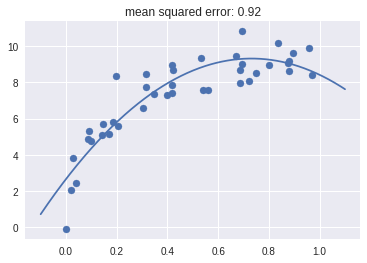

In [13]:
model = PolynomialRegression(2)
model.fit(X, y)
y_test = model.predict(X_test)
plt.scatter(X.ravel(), y)
plt.plot(X_test.ravel(), y_test)
plt.title("mean squared error: {0:.3g}".format(mean_squared_error(model.predict(X), y)));

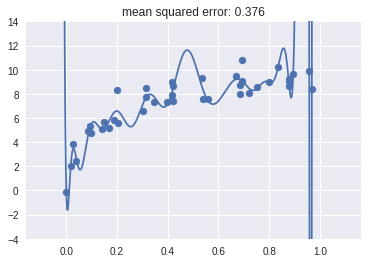

In [14]:
model = PolynomialRegression(30)
model.fit(X, y)
y_test = model.predict(X_test)
plt.scatter(X.ravel(), y)
plt.plot(X_test.ravel(), y_test)
plt.title("mean squared error: {0:.3g}".format(mean_squared_error(model.predict(X), y)))
plt.ylim(-4, 14);

In [16]:
from IPython.html.widgets import interact
def plot_fit(degree=1, Npts=50):
  X, y = make_data(Npts, error=1)
  X_test = np.linspace(-0.1, 1.1, 500)[:, None]
  model = PolynomialRegression(degree=degree)
  model.fit(X, y)
  y_test = model.predict(X_test)
  plt.scatter(X.ravel(), y)
  plt.plot(X_test.ravel(), y_test)
  plt.ylim(-4, 14)
  plt.title("mean squared error: {0:.2f}".format(mean_squared_error(model.predict(X), y)))
interact(plot_fit, degree=[1, 30], Npts=[2, 100]);

/usr/local/lib/python3.7/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


interactive(children=(Dropdown(description='degree', options=(1, 30), value=1), Dropdown(description='Npts', o…

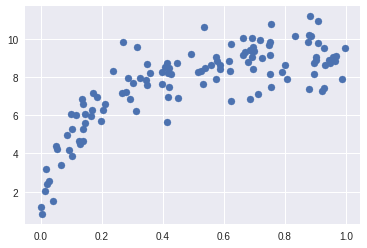

In [17]:
X, y = make_data(120, error=1.0)
plt.scatter(X, y);

from sklearn.model_selection import validation_curve
def rms_error(model, X, y):
  y_pred = model.predict(X)
  return np.sqrt(np.mean((y - y_pred) ** 2))
degree = np.arange(0, 18)
val_train, val_test = validation_curve(PolynomialRegression(), X, y,
'polynomialfeatures__degree', degree, cv=7,
scoring=rms_error)

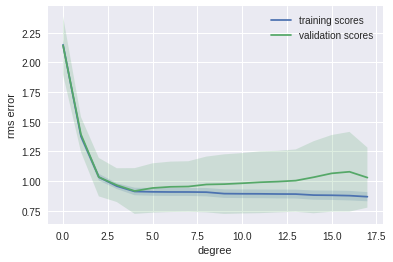

In [18]:
def plot_with_err(x, data, **kwargs):
  mu, std = data.mean(1), data.std(1)
  lines = plt.plot(x, mu, '-', **kwargs)
  plt.fill_between(x, mu - std, mu + std, edgecolor='none',
  facecolor=lines[0].get_color(), alpha=0.2)
plot_with_err(degree, val_train, label='training scores')
plot_with_err(degree, val_test, label='validation scores')
plt.xlabel('degree'); plt.ylabel('rms error')
plt.legend();

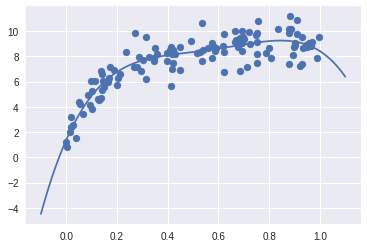

In [19]:
model = PolynomialRegression(4).fit(X, y)
plt.scatter(X, y)
plt.plot(X_test, model.predict(X_test));

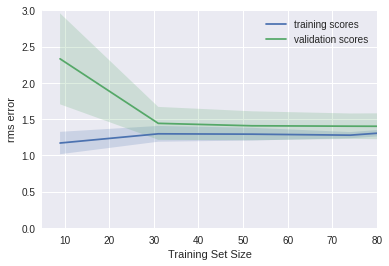

In [22]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(degree=3):
  train_sizes = np.linspace(0.05, 1, 120)
  N_train, val_train, val_test = learning_curve(PolynomialRegression(degree),
  X, y, train_sizes, cv=5,
  scoring=rms_error)
  plot_with_err(N_train, val_train, label='training scores')
  plot_with_err(N_train, val_test, label='validation scores')
  plt.xlabel('Training Set Size'); plt.ylabel('rms error')
  plt.ylim(0, 3)
  plt.xlim(5, 80)
  plt.legend()

plot_learning_curve(1)

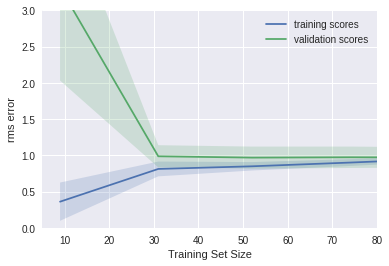

In [23]:
plot_learning_curve(3)

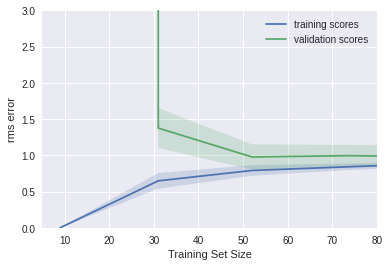

In [24]:
plot_learning_curve(10)